In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Library.Lin_alg import*
from Library.Data_fit import*
import prettytable as pt

# Q.1 

![Screenshot from 2024-04-08 18-54-02.png](<attachment:Screenshot from 2024-04-08 18-54-02.png>)
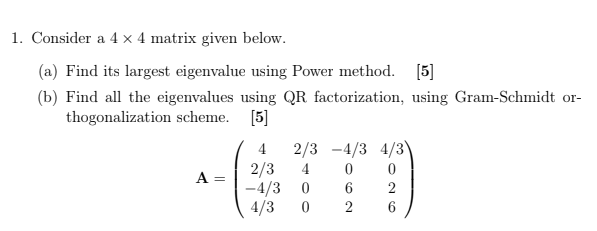

In [2]:
#Given Matrix
A = np.array([[4,2/3,-4/3,4/3],
     [2/3,4,0,0],
     [-4/3,0,6,2],
     [4/3,0,2,6]]) 

# <h3> Power Method

In [3]:
# Dominant Eigenvalues and eigenvector using Power Iteration
eigenvalue, eigenvector = power_iteration(A)
print("Dominant eigenvalue:", eigenvalue)
print()
print("Corresponding eigenvector:", eigenvector)

Dominant eigenvalue: 7.999999999999999

Corresponding eigenvector: [2.09916889e-10 6.99723045e-11 7.07106781e-01 7.07106781e-01]


# <h3> QR Decomposition

In [4]:
# Eigenvalues using QR decompostionScreenshot from 2024-04-08 19-07-07.png
eigvals_QR , steps = eigen_val_QR(A)
print("Eigenvalues using QR method: ", eigvals_QR)
print()
print("Number of Iterations: ", steps)

Eigenvalues using QR method:  [6. 4. 8. 2.]

Number of Iterations:  21


# Q.2

![Screenshot from 2024-04-08 19-07-07.png](<attachment:Screenshot from 2024-04-08 19-07-07.png>)
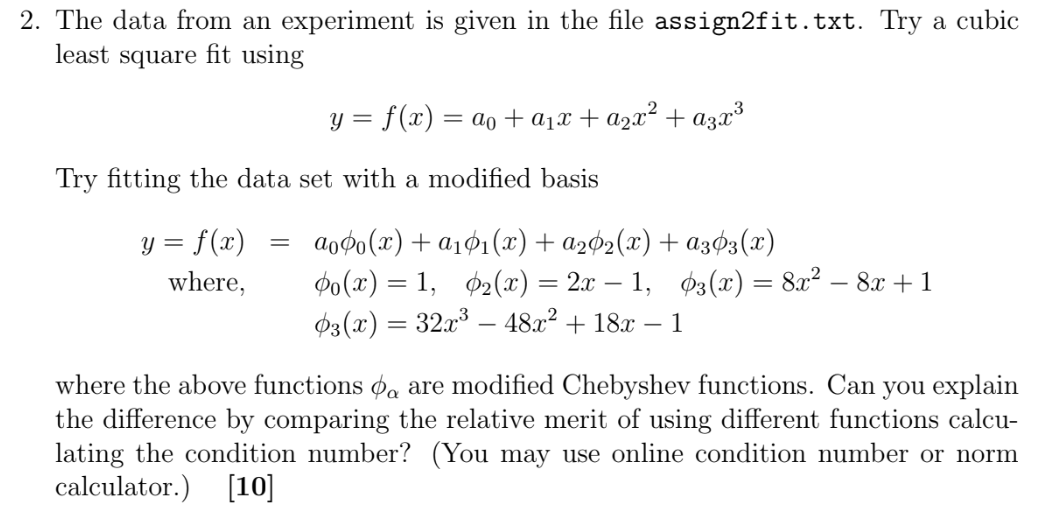

In [5]:
# Read the data file
data = read_matrices("assign3fit.txt")
data = np.array(data[0])

xlist = data[:, 0]
ylist = data[:, 1]


# <h3> polynomial fit with degree 3

In [6]:
# Fitting with all the weights as 1
sigma = np.ones(len(xlist))
coeff_list,A_poly = polynomial_fit(np.copy(xlist), np.copy(ylist), np.copy(sigma), 3)

In [7]:
# print the coefficients
print("The coefficients for the fitted polynomial of degree 3 are :")
p = pt.PrettyTable()
table = pt.PrettyTable()
table.field_names = ['Coefficient', 'Value']
for i, coeff in enumerate(coeff_list):
    table.add_row([f'a{i}', np.round(coeff,6)])
print(table)

The coefficients for the fitted polynomial of degree 3 are :
+-------------+------------+
| Coefficient |   Value    |
+-------------+------------+
|      a0     |  0.574659  |
|      a1     |  4.725861  |
|      a2     | -11.128218 |
|      a3     |  7.668678  |
+-------------+------------+


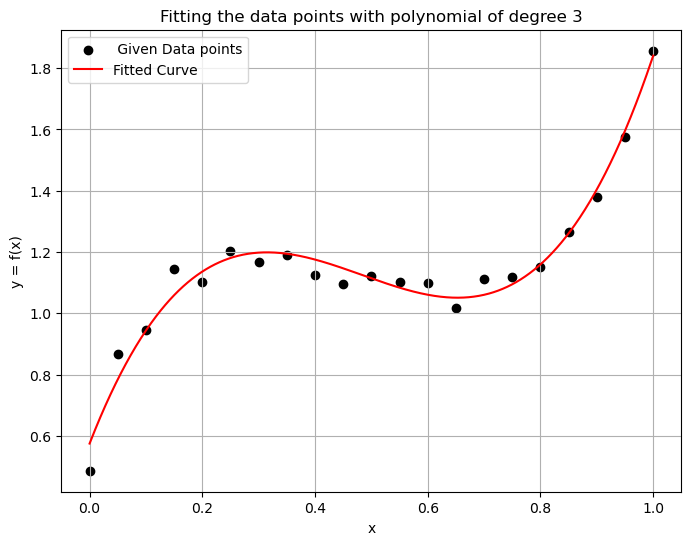

In [8]:
# Plot the data points and the fitted curve
def poly_fn(x,coefflist):
    sum = 0
    for i in range(len(coefflist)):
        sum += coefflist[i]*x**i
    return sum    


plt.figure(figsize=(8,6))
plt.scatter(xlist, ylist, label=' Given Data points', color='black')

xlist_new = np.linspace(min(xlist), max(xlist), 1000)
ylist_new = poly_fn(xlist_new, coeff_list)

plt.plot(xlist_new, ylist_new, label='Fitted Curve', color='red')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.title('Fitting the data points with polynomial of degree 3')
plt.grid()
plt.legend()
plt.show()

In [9]:
"""
Modified Polynomial fit with the chebyshev polynomial Definitiion
"""
def polynomial_fit_mod_chebyshev(xlist: list, ylist: list,sigma_list: list,degree: int):
    # Defining the modified chebyshev polynomial
    def modified_chebyshev_polynomial(x,degree):
        def chebyshev_polynomial(x,degree):
            if degree == 0:
                return 1
            elif degree == 1:
                return x
            else:
                return 2*x*chebyshev_polynomial(x,degree-1) - chebyshev_polynomial(x,degree-2)
        return chebyshev_polynomial(2*x - 1,degree)
    xlist = np.array(xlist)
    ylist = np.array(ylist)
    sigma_list = np.array(sigma_list)
    A_matrix = np.zeros((degree+1,degree+1))

    for i in range(degree+1):
        for j in range(degree+1):
            # Replace the polynomial with the modified chebyshev polynomial
            A_matrix[i][j] = np.sum((modified_chebyshev_polynomial(xlist,i)*modified_chebyshev_polynomial(xlist,j))/(sigma_list**2))
    B_matrix = np.zeros(degree+1)
    for i in range(degree+1):
        B_matrix[i] = np.sum((ylist*(modified_chebyshev_polynomial(xlist,i)))/(sigma_list**2))
    a = np.linalg.solve(A_matrix,B_matrix)    
    return a,A_matrix

In [10]:
'''
Fitting the data points with the modified Chebyshev Polynomials
'''
def poly_fn_mod(x,coefflist):
    sum = 0
    for i in range(len(coefflist)):
        sum += coefflist[i]*modified_chebyshev_polynomial(x,i)
    return sum    


coeff_list_mod, A_mod = polynomial_fit_mod_chebyshev(np.copy(xlist), np.copy(ylist), np.copy(sigma),3)


print("The coefficients for the fitting with modified_chebyshev_polynomial of degree 3 are :")
p = pt.PrettyTable()
table = pt.PrettyTable()
table.field_names = ['Coefficient', 'Value']
for i, coeff in enumerate(coeff_list_mod):
    table.add_row([f'a{i}', np.round(coeff,6)])
print(table)

The coefficients for the fitting with modified_chebyshev_polynomial of degree 3 are :
+-------------+----------+
| Coefficient |  Value   |
+-------------+----------+
|      a0     | 1.160969 |
|      a1     | 0.393514 |
|      a2     | 0.04685  |
|      a3     | 0.239646 |
+-------------+----------+


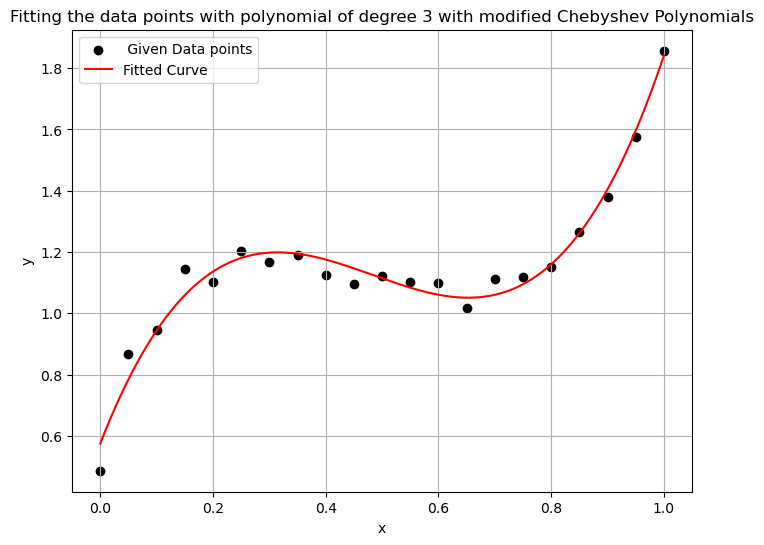

In [11]:
# Plt the data points and the fitted curve
plt.figure(figsize=(8,6))
plt.scatter(xlist, ylist, label=' Given Data points', color='black')
xlist_new = np.linspace(min(xlist), max(xlist), 1000)
ylist_new = [poly_fn_mod(x,coeff_list_mod) for x in xlist_new]
plt.plot(xlist_new, ylist_new, label='Fitted Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting the data points with polynomial of degree 3 with modified Chebyshev Polynomials')
plt.grid()
plt.legend()
plt.show()

# <h3> Comparison of condition number

In [12]:
CN_poly = np.linalg.cond(A_poly)
CN_Chev = np.linalg.cond(A_mod)

p = pt.PrettyTable()
p.field_names = ['Basis used', 'Condition Number']
p.add_row(['n-deg Polynomial', CN_poly])
#put a horizontal line
p.add_row(['-'*40, '-'*40])
p.add_row(['n-deg chebyshev Polynomial', CN_Chev])

print(p)

+------------------------------------------+------------------------------------------+
|                Basis used                |             Condition Number             |
+------------------------------------------+------------------------------------------+
|             n-deg Polynomial             |            12104.948671034383            |
| ---------------------------------------- | ---------------------------------------- |
|        n-deg chebyshev Polynomial        |            3.8561465786155766            |
+------------------------------------------+------------------------------------------+


# <h4> The table shows that the condition number for the normal polynomial fit is significantly larger than that for the modified Chebyshev polynomial fit. This indicates that the modified Chebyshev polynomial fit is more stable compared to the normal polynomial fit.

# Q.3

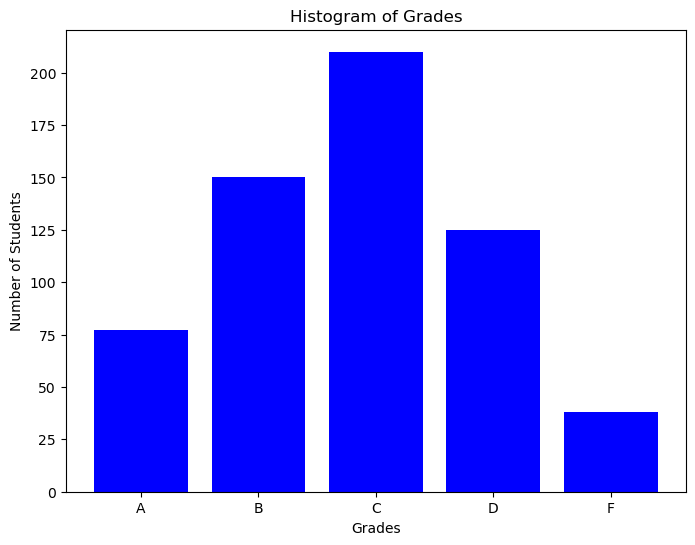

In [13]:
# Load the dataset
x = ['A','B','C','D','F']
Y = [77, 150, 210, 125, 38]
#do histogram
plt.figure(figsize=(8,6))
plt.bar(x,Y, color='blue')
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.title('Histogram of Grades')
plt.show()

# <h5> For the calculation and discussion check the attched pdf and google sheet files

# Q.4